# Problem set 7

### Problem 1.   Drunken sailors leaving a pub that is near a ditch

A random walk is sometimes described with a drunken sailor who takes a step and then forgets which way he was going and then takes another step.  We start our sailors at $x=0$ (the pub). 
After $N$ steps we expect that the distribution of a bunch 
of sailors (all leaving the pub at the same time) and moving in 1 dimension is Gaussian in shape. 

<img src="drunken_sailor_nd.png">

A normalized Gaussian probability distribution with mean $\mu=0$ and dispersion $\sigma$  is 
$$ p(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-x^2/(2 \sigma^2)} $$
Here the dispersion (or standard deviation) $\sigma$ is the the square root of the variance.
The variance of a probability distribution with zero mean is
$$\sigma^2 = \int p(x) x^2 dx $$

If the dispersion of a single step is $\sigma$ then the distribution of sailors after $N$ steps is
well described by a probability distribution
$$ p(x,N) = \frac{1}{\sqrt{2 \pi \sigma_N^2}} e^{-x^2/(2 \sigma_N^2)} $$
with $\sigma_N = \sqrt{N}\sigma$.

Below I illustrate a code that does a 1-dimensional random walk using a sum of Gaussian distributions.
The resulting distribution of drunk sailors matches the predicted Gaussian distribution.

The <b> Central Limit Theorem </b> states that the sum of a bunch of independent variables should (in most cases)
be well described by a normal (Gaussian) distribution.  
See https://en.wikipedia.org/wiki/Central_limit_theorem 

So as long as each step is generated by a well
behaved probability distribution, it does not matter what we use to generate it.  In other words we should
get the same behavior using steps generated from a normal distribution as we would if we had flipped a coin at each step, taking a step of equal length  in either direction.  Here *well behaved* means with finite mean and variance.


In [1]:
# example making a random walk and showing that the distribution after a number of
# steps is a gaussian 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats # has lots of distribution functions in it
from math import erfc   # complimentary error function 

# randomly walk nsteps and return the x value
# starting at x=0
# each step has zero mean and a variance of 1
def walkn(nsteps):  # random walk using a normal distribution for step sizes
    r = stats.norm.rvs(size=nsteps)  # normal distribution mean=0 variance=1
    # r is a vector values randomly generated with a normal distribution
    return sum(r)  # the sum of the entire vector!

# walk npart numbers of particles (or sailors) nsteps and return a vector of x positions
# the function that gives us a randomly generated position is walkn
def npart_walkn(npart,nsteps):
    xvec = np.zeros(0)
    for i in range(npart):
        x = walkn(nsteps)  # a single random walk value
        xvec = np.append(xvec,x)  # append each random walk to the vector
    return xvec

nsteps = 100 # number of steps
npart = 1000 # number of particles (sailors) to let walk around
# fill a vector with npart walkers each walking nsteps
xvec = npart_walkn(npart,nsteps)


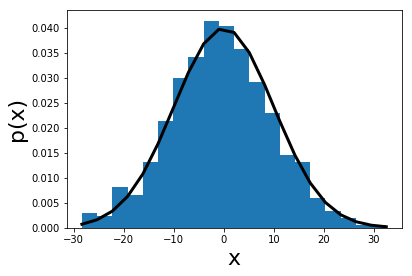

In [4]:
# plot the histogram, i.e., measured distribution of final positions 
#   after n steps of random walking 
n, bins, patches =plt.hist(xvec,bins=20,normed=1)
# this retuns as n the number of values counted, bins is the x values of the bins, 
# patches is for plotting the histogram 
plt.xlabel("x",fontsize=22)
plt.ylabel("p(x)",fontsize=22)  # probability!

# a gaussian probability density distribution, this is a function!
mygaus = stats.norm(0.0, np.sqrt(nsteps))  # should scale with sqrt(nsteps)
y = mygaus.pdf(bins)  # evaluate the function at the bin locations
plt.plot(bins,y,"k", lw=3 )  #plot the expected density distribution as a black line

After 100 steps of random walk 1000 particles show a gaussian distribution with width predicted using
the square root of the number of steps (and their sizes).

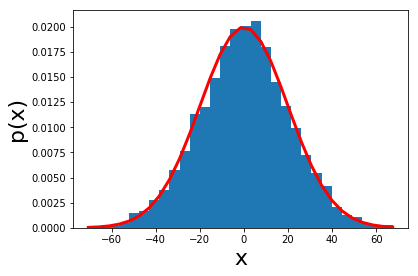

In [7]:
# check that if we increase the number of particles we get the same answer
nsteps = 400 # number of steps
npart = 4000   # number of particles to let walk around
xvec = npart_walkn(npart,nsteps)

# plot the histogram, i.e., measured distribution of final positions after n steps of random walking around
n, bins, patches =plt.hist(xvec,bins=30,normed=1)
plt.xlabel("x",fontsize=22)
plt.ylabel("p(x)",fontsize=22)

# a gaussian probability density distribution - is a function!
mygaus = stats.norm(0.0, np.sqrt(nsteps))  # should scale with sqrt(nsteps)
y = mygaus.pdf(bins) # evaluate the probability distribution at the bin values
plt.plot(bins,y,"r", lw=3 )  #plot the expected density distribution as a red line

After 400 steps of random walk 4000 particles show a gaussian distribution with width predicted using
the square root of the number of steps (and their sizes).
This picture should look even better than the last one as we ran more particles and steps, and that's good.

In [13]:
# notes on the stats package
n=0
stats.norm.rvs(size=n)  # returns a vector n long that has random values from a normal distribution
stats.norm.rvs()  # returns a single random number (generated from a normal distribution)
func = stats.norm.pdf  # a probability density function that is normal!
# you can call this with func(x)
mean=0; std=1
stats.norm(mean, std).rvs()  # uses a normal distribution with mean and standard deviation

0.9751142786297822

In [7]:
func = stats.norm.pdf


### Problem 1 continued.  Random walk with a ditch

If there is a post at $x_p>0$ the fraction of sailors currently past the post after $N$ steps of size chosen with dispersion $\sigma$ is

\begin{align*}
 f(x_p,N) &= \int_{x_p}^\infty \frac{1}{\sqrt{2 \pi \sigma_N^2}} e^{-x^2/(2 \sigma_N^2)} dx \\
 &= \int_{x_p/(\sqrt{2}\sigma_N)}^\infty \frac{1}{\sqrt{\pi}}e^{-z^2} dz\\
 &= \frac{1}{2} {\rm erfc}\left( \frac{x_p}{\sqrt{2}\sigma_N} \right)
\end{align*}
with $\sigma_N = \sqrt{N} \sigma$.

The complimentary error function is defined as
$$ {\rm erfc}(y) \equiv \frac{2}{\pi} \int_y^\infty  e^{-t^2} dt $$

<img src="drunken_sailor.png">

We now place a ditch at a particular $x$ 
location, $x_{ditch}$  which we take to be $>0$.   
If a drunken sailor steps into the ditch then he can't get out and sleeps there until morning.

<ol> 
<li>
Compute a probability distribution of remaining sailors that are not in the ditch after a number of steps $N$.
Show that the probability distribution is not much different than a Gaussian distribution as long as
$ \sqrt{N}\sigma \ll x_{ditch} $, but as $N$ increases, the distribution becomes lopsided.  Make sure your  distribution is normalized (integrates to 1),
</li>
<li>
Compare your probability distribution using  number of particles,  $N_{particles}$, with that computed
using twice as many particles.   Illustrate that your results are not strongly dependent on the
number of particles for which you are computing random walk trajectories.
</li>
<li>
As a function of of numbers of steps $N$, compute numerically the fraction of sailors left in the ditch. 
</li>
 
We can estimate the fraction of drunk sailors that
have fallen into the ditch  by integrating the tail of the  probability density distribution in the absence of the ditch. 
As above we estimate that the fraction of sailors in the ditch after $N$ steps is described with this function 
$$ f(x_{ditch},N ) \sim \frac{1}{2} {\rm erfc}\left( \frac{x_{ditch}}{\sqrt{2}\sigma_N} \right)$$

The erfc function is available as *math.erfc()*

<li>
As a function of the number of steps $N$, compare your numerically measured fraction of sailors in the ditch to
the function $f(x_{ditch}, N )$
 computed with the complimentary error function.
Show that the analytical estimate is incorrect. In fact, many more sailors wind up in the ditch!

Explain why.
</li>
</ol>

For N=60 and $x_{ditch}=10$ I find that about twice as many sailors wind up in the ditch as incorrectly
predicted with this formula.

Physicists have exploited this analogy to trap atoms in a potential well using thermal motions.



### Problem 2. Levy Flights and heavy tailed distributions

An example of a probability distribution that is *heavy tailed* is the Cauchy distribution. See https://en.wikipedia.org/wiki/Cauchy_distribution

$$f(x) = \frac{1}{\pi} \frac{1}{x^2+ 1} $$
Its full width half-max (FWHM = full width half max) can be controlled with a parameter $\gamma$ giving a probability distribution
$$f(y) =  \frac{1}{\pi\gamma} \frac{\gamma^2}{y^2+ \gamma^2} $$

This distribution has a nice property that a sum of random variables drawn from Cauchy distributions is also
Cauchy (but with a different FWHM).  However it has tails that are pathological in the sense that the distribution
has infinite variance and so it is an example of something that violates the Central Limit theorem.

To illustrate the difference we show a 2dimensional random walk generated with steps
taken from  a Cauchy distribution
and compare it to that generated from a random walk taken with steps generated from a normal distribution.


In [20]:
# example comparing 2Dimensional random walks with normal and Cauchy distribution steps
    
# fill some vectors with random walks using Gaussian and using Cauchy distributions
# for sizes of steps
# 2d random walls, returns 4 vectors x,y for each random walk
# angles for each step are chosen from uniform distribution
# but distances moved in each step are chosen from normal or Cauchy distributions
# nsteps is the number of steps taken for both random walks
def fillvecs(nsteps):
    xCvec=np.zeros(0); yCvec=np.zeros(0)  # vectors of positions for Cauchy steps
    xC=0.0; yC=0.0;  # initial conditions Cauchy walk
    xCvec = np.append(xCvec,xC); yCvec = np.append(yCvec,yC)
    xNvec=np.zeros(0); yNvec=np.zeros(0)  # vectors of positions for normal steps
    xN=0.0; yN=0.0   # initial conditions Normal walk
    xNvec = np.append(xNvec,xN); yNvec = np.append(yNvec,yN)
    fac = 0.1  # adjust size of steps for Cauchy walk
    for i in range(nsteps):
        theta1 = stats.uniform.rvs()*2.0*np.pi  #uniformly distributed angles
        theta2 = stats.uniform.rvs()*2.0*np.pi
        rC = fac*stats.cauchy.rvs()  #cauchy distn step size
        rN = stats.norm.rvs()   # normal distn step size
        xC += rC*np.cos(theta1) # update coordinate positions
        yC += rC*np.sin(theta1)
        xCvec = np.append(xCvec,xC); yCvec = np.append(yCvec,yC)  #Cauchy
        xN += rN*np.cos(theta2)  #update coordinate positions
        yN += rN*np.sin(theta2)
        xNvec = np.append(xNvec,xN); yNvec = np.append(yNvec,yN) #Normal
    return xCvec,yCvec,xNvec,yNvec  # return the 4 vectors
        

The routines *stats.cauchy.rvs()* and *stats.norm.rvs()* can return a vector of randomly generated numbers.

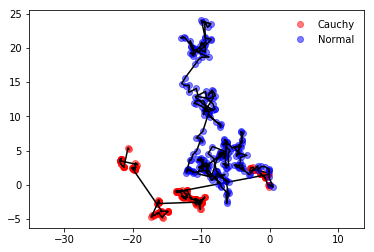

In [23]:
xC,yC,xN,yN = fillvecs(230)  # get our random walk trajectories
# and plot them
plt.plot(xC,yC,'ro',alpha=0.5, label="Cauchy")  
plt.plot(xC,yC,'k-')
plt.plot(xN,yN,'bo',alpha=0.5,label="Normal")
plt.plot(xN,yN,'k-')
plt.legend(loc='best', frameon=False)
plt.axis('equal');

We notice that the normal distribution random walk looks very different than the Cauchy one.
The Cauchy one has intermittent clumps and large intermediate steps due to its tail.
The two walks look very different! Here I have reduced the size of the Cauchy steps by a factor of 0.1
so we could get the two walks nicely in the same window!

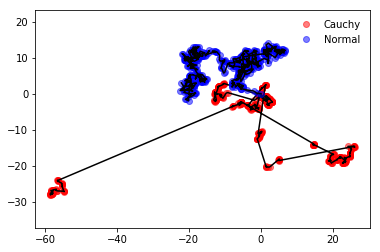

In [24]:
# do it again!
xC,yC,xN,yN = fillvecs(500)  # get our random walk trajectories
# and plot them
plt.plot(xC,yC,'ro', alpha=0.5, label="Cauchy")  
plt.plot(xC,yC,'k-')
plt.plot(xN,yN,'bo',alpha = 0.5, label="Normal")
plt.plot(xN,yN,'k-')
plt.legend(loc='best', frameon=False)
plt.axis('equal');

### Problem 2 continued

Consider a random variable $z = x+ y$ that is a sum of two randomly generated variables.
We take $x$ generated with a normal distribution and $y$ generated with a Cauchy distribution.

In other words let $x$ be generated with a normal probability distribution
$$ p(x) = \frac{1}{\sqrt{2 \pi }} e^{-x^2/2 } $$
and $y$ be generated with a Cauchy distribution with 
$$f(y) =  \frac{1}{\pi\gamma} \frac{\gamma^2}{y^2+ \gamma^2} $$

We do a random walk where
 each step is given by $z$ and is  the sum of a randomly generated $x$ and a randomly generated $y$.
This is a 1d random walk.

1. Write a 1 dimensional random walk routine where each step is a sum of a step generated from a normal distribution and one from a Cauchy distribution.

    To adjust the size of the Cauchy step, you can multiply the numbers  generated  with $\gamma=1$ with a desired size for the FWHM.

    By running random walks for a bunch of particles you can look at the distributions after a number of steps.

2. Show that after a while (a number of steps) the resulting distribution of locations has tails like the Cauchy distribution, and this is true even if you take smaller Cauchy steps (FWHM)  (with $\gamma<1$) than normal steps at each time.   How many steps does it take before the distribution of $z$ values for $N_{particles}$ resembles a Cauchy distribution?

    Even if there are weak heavy tails, they will  dominate
the probablity distribution (or diffusive behavior) on long timescales. 
This is related to  *anomalous diffusion* and *Levy flights*.  See https://en.wikipedia.org/wiki/Anomalous_diffusion and 
https://en.wikipedia.org/wiki/L%C3%A9vy_flight

    At timestep $s$, 
the mean of the distribution of $N_{particles}$  is
$$ \mu_s = \frac{1}{N_{particles}} \sum_{i=1}^{N_{particles}} z_i$$
where $z_i$ is the position of the $i$-th particle.
The variance is 
$$\sigma_s^2 = \frac{1}{N_{particles}} \sum_{i=0}^{N_{particles}} (z_i - \mu_s)^2 $$

3. Compute the standard deviation (sqrt of the variance) of the particles at each time step and show that it increases wildly with increasing numbers of steps.   Useful routines are *numpy.var()* or *numpy.std()* .

    For a random walk generated with a normal distribution alone, the standard deviation is well behaved and increases with the sqrt of the number of steps taken.   With the Cauchy distribution a single particle every once in a while takes a huge step and these dominate the computation of the standard deviation.  Only on short times (few steps) and with extremely small levels of the Cauchy added in do I see sqrt like behavior in the standard deviation as a function of the number of steps.


hint: you may need to limit the range of the histogram, for example with 

n, bins, patches =plt.hist(xvec,bins=20,normed=1, range=[-50,50])